# Bike Sharing Case Study


## Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

Essentially the company wants :

●To understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19, by creating a linear model.

●To identify the variables affecting their revenues i.e. Which variables are significant in predicting the demand for shared bikes.

●To know the accuracy of the model, i.e. How well those variables describe the bike demands
They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

# Importing Libraries


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Step 1:Reading  and understanding data

In [6]:
bike=pd.read_csv('day.csv')
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In the Bike Prediction dataset there are a total of 730 rows and 16 columns in which we need to use the 'CNT' column for the prediction purposes.

In [7]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bike.shape

(730, 16)

In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Quality Check


In [10]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [11]:
# percentage of missing values in each row
round(100*(bike.isnull().sum(axis=1)/len(bike)), 2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

The above data has no missing/ NULL values

In [12]:
# Checking for duplicate values

bike_dup = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

No duplicate values are present

## Data Cleaning


Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

instant : This is a index column, we have a default index for the same purpose

dteday : This column has date. Since, we already have separate year and month column, we can carry out our analysis without this column.

casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two column.

In [13]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [14]:
bike=bike.drop(['instant','dteday'],axis=1)
bike.shape

(730, 14)

In [15]:
bike=bike.drop(['casual','registered'],axis=1)
bike.shape

(730, 12)

In [16]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [17]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [18]:
import calendar
bike['mnth'] = bike['mnth'].apply(lambda x: calendar.month_abbr[x])

In [19]:
# Maping seasons
bike.season = bike.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [20]:
# Mapping weathersit
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [21]:
#Mapping Weekday
bike.weekday = bike.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

# Step 2: Visualising the data

In [22]:
bike.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

## Univariate Analysis

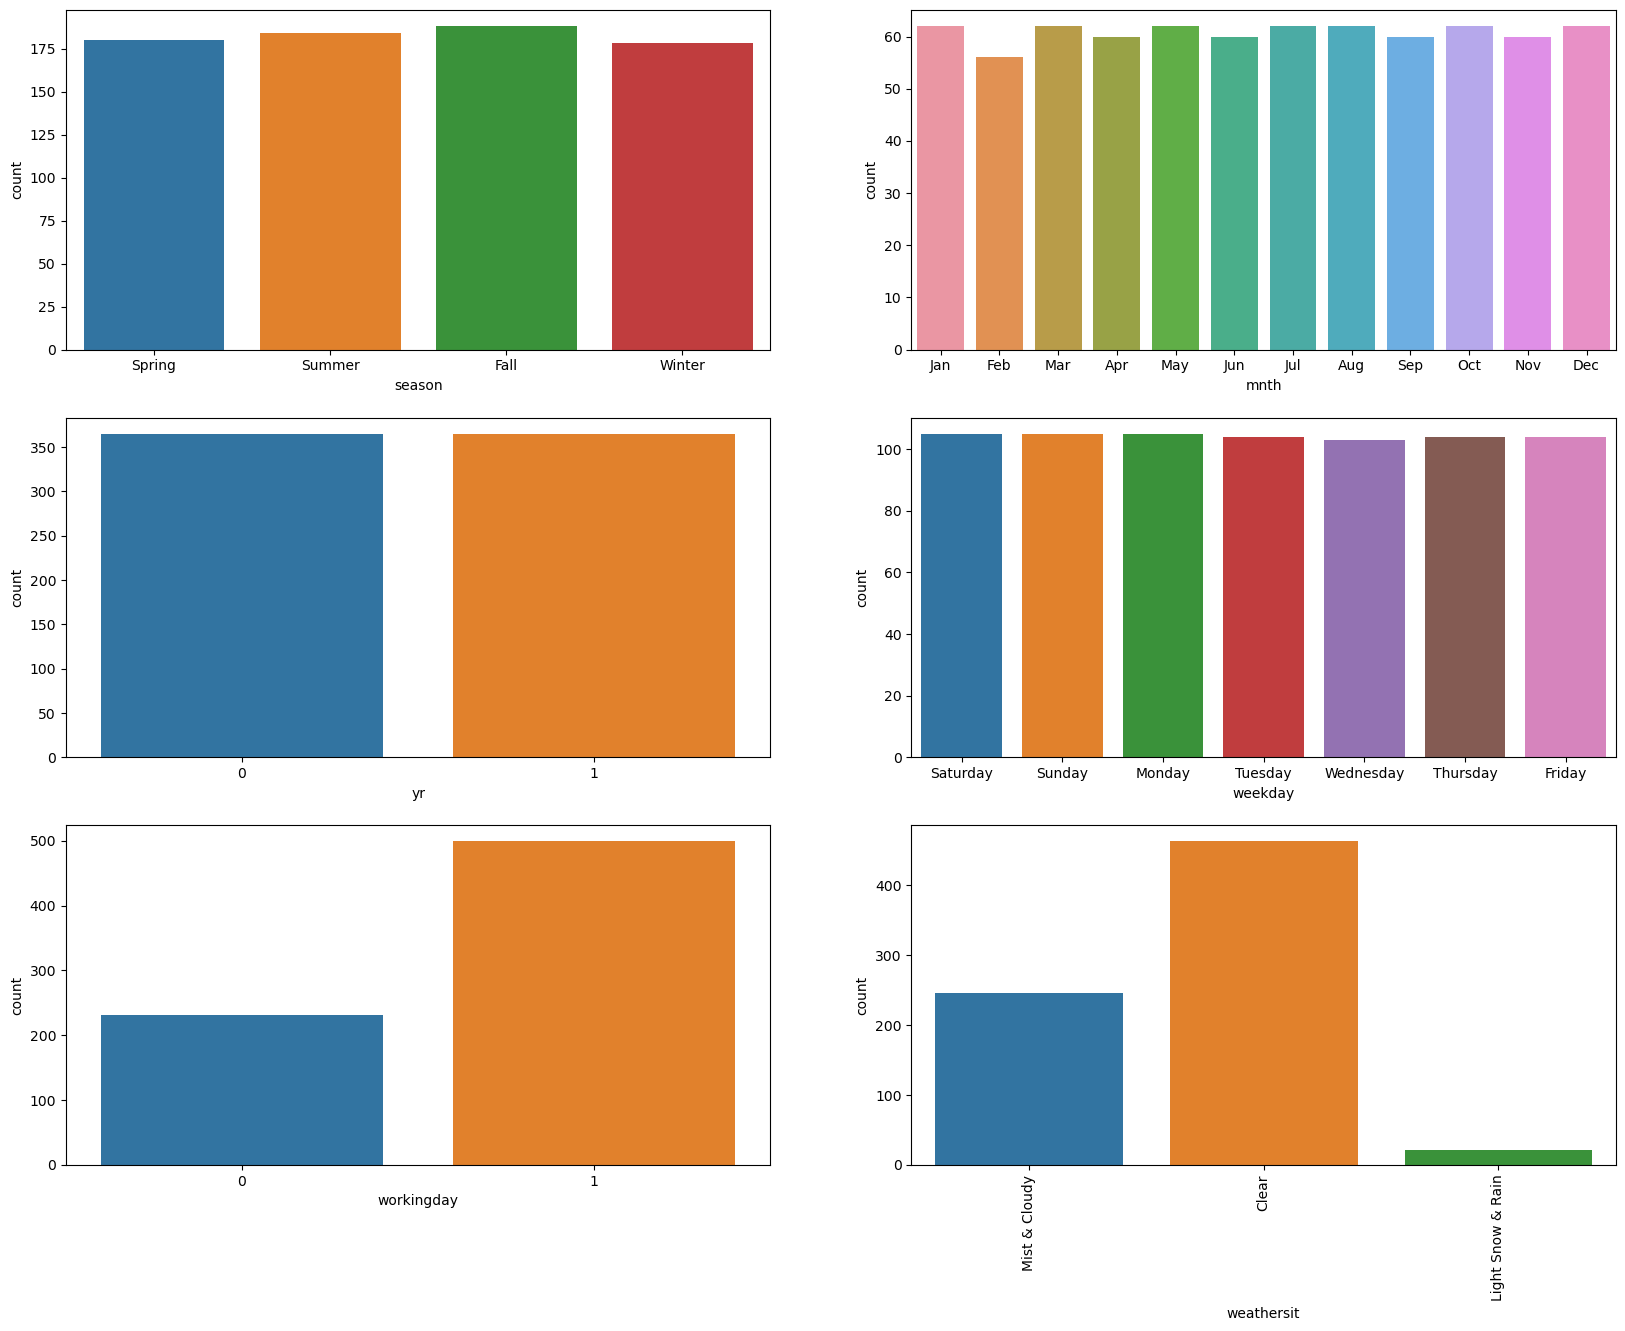

In [25]:
plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
sns.countplot(x = bike.season)

plt.subplot(3,2,2)
sns.countplot(x = bike.mnth)

plt.subplot(3,2,3)
sns.countplot(x = bike.yr)

plt.subplot(3,2,4)
sns.countplot(x = bike.weekday)

plt.subplot(3,2,5)
sns.countplot(x = bike.workingday)

plt.subplot(3,2,6)
sns.countplot(x = bike.weathersit)
plt.xticks(rotation =90)
plt.show()

### Insights:
● Season :- We can observe business was operating  days in all four seasons.

● Mnth :- We can observe business was operating similar  in all months.

● Weekday :- We can observe business was operating similar days in every weekday.

● Weathersit :- We can observe there is no any data for 4th(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) weather so we can assume company was not working on that season and in 2nd weather (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) there was approx half demand and in third weather company was operating very less days (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds).

● Workingday :- Business was operating more in business day comparison to non working day (holiday).

# Bivariate Analysis

### Visualizing the Numeric variables

<Figure size 1500x3000 with 0 Axes>

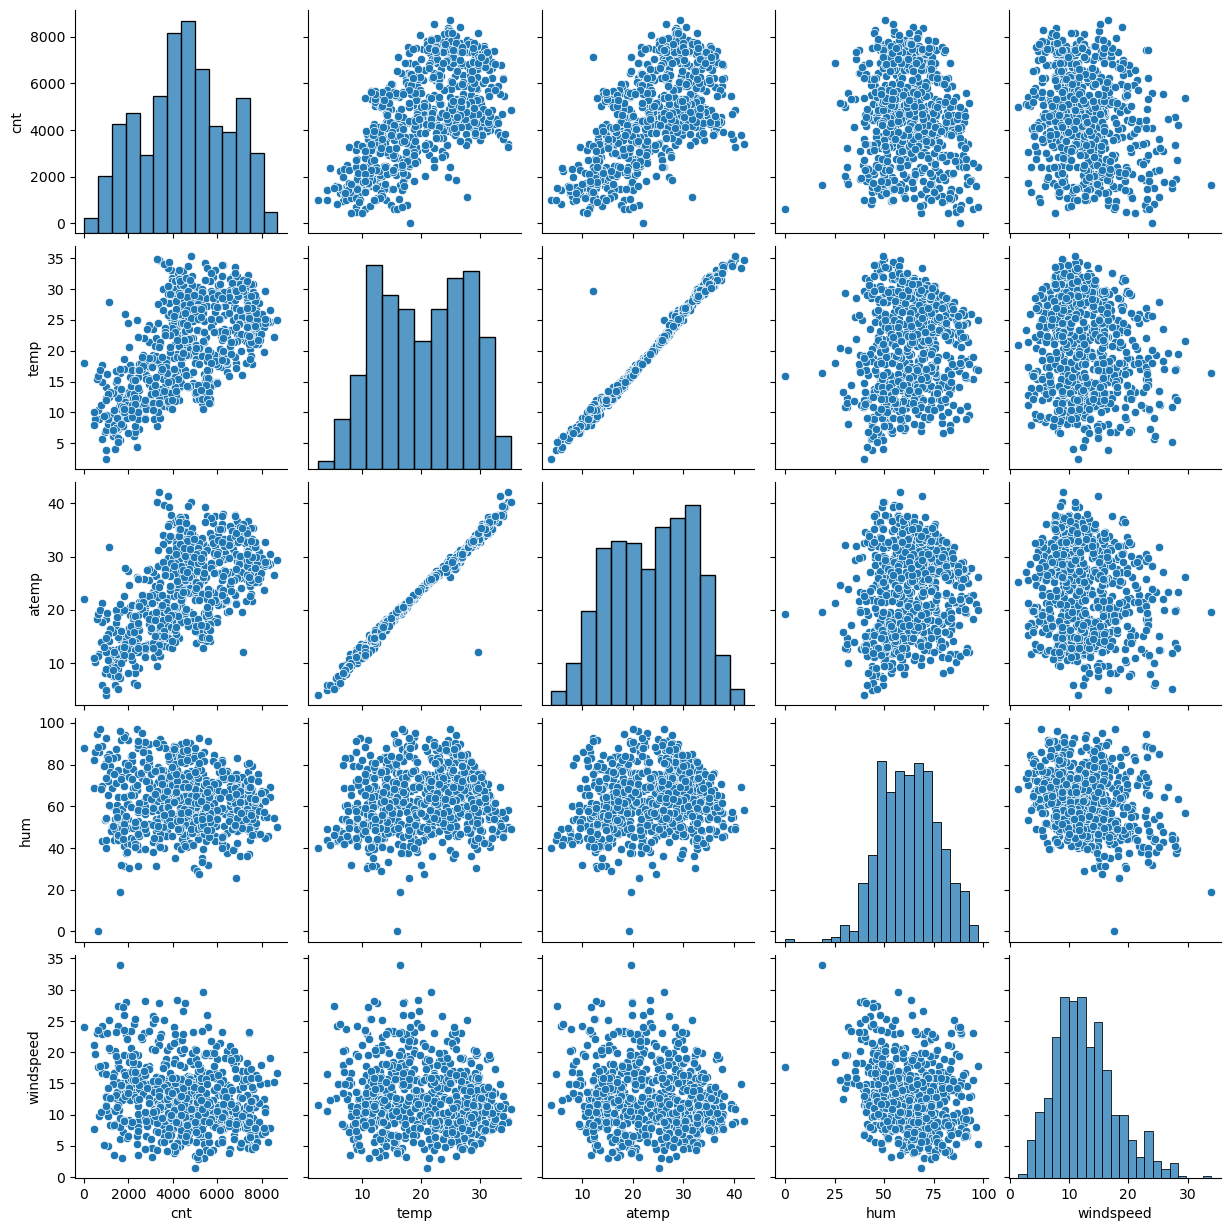

In [23]:

plt.figure(figsize = (15,30))
sns.pairplot(data=bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Insights:
Here we can observe there is high correlation between temp & atemp with cnt.so linear model can be considered in this case.

### Visualizing the Categoical variables using boxplot

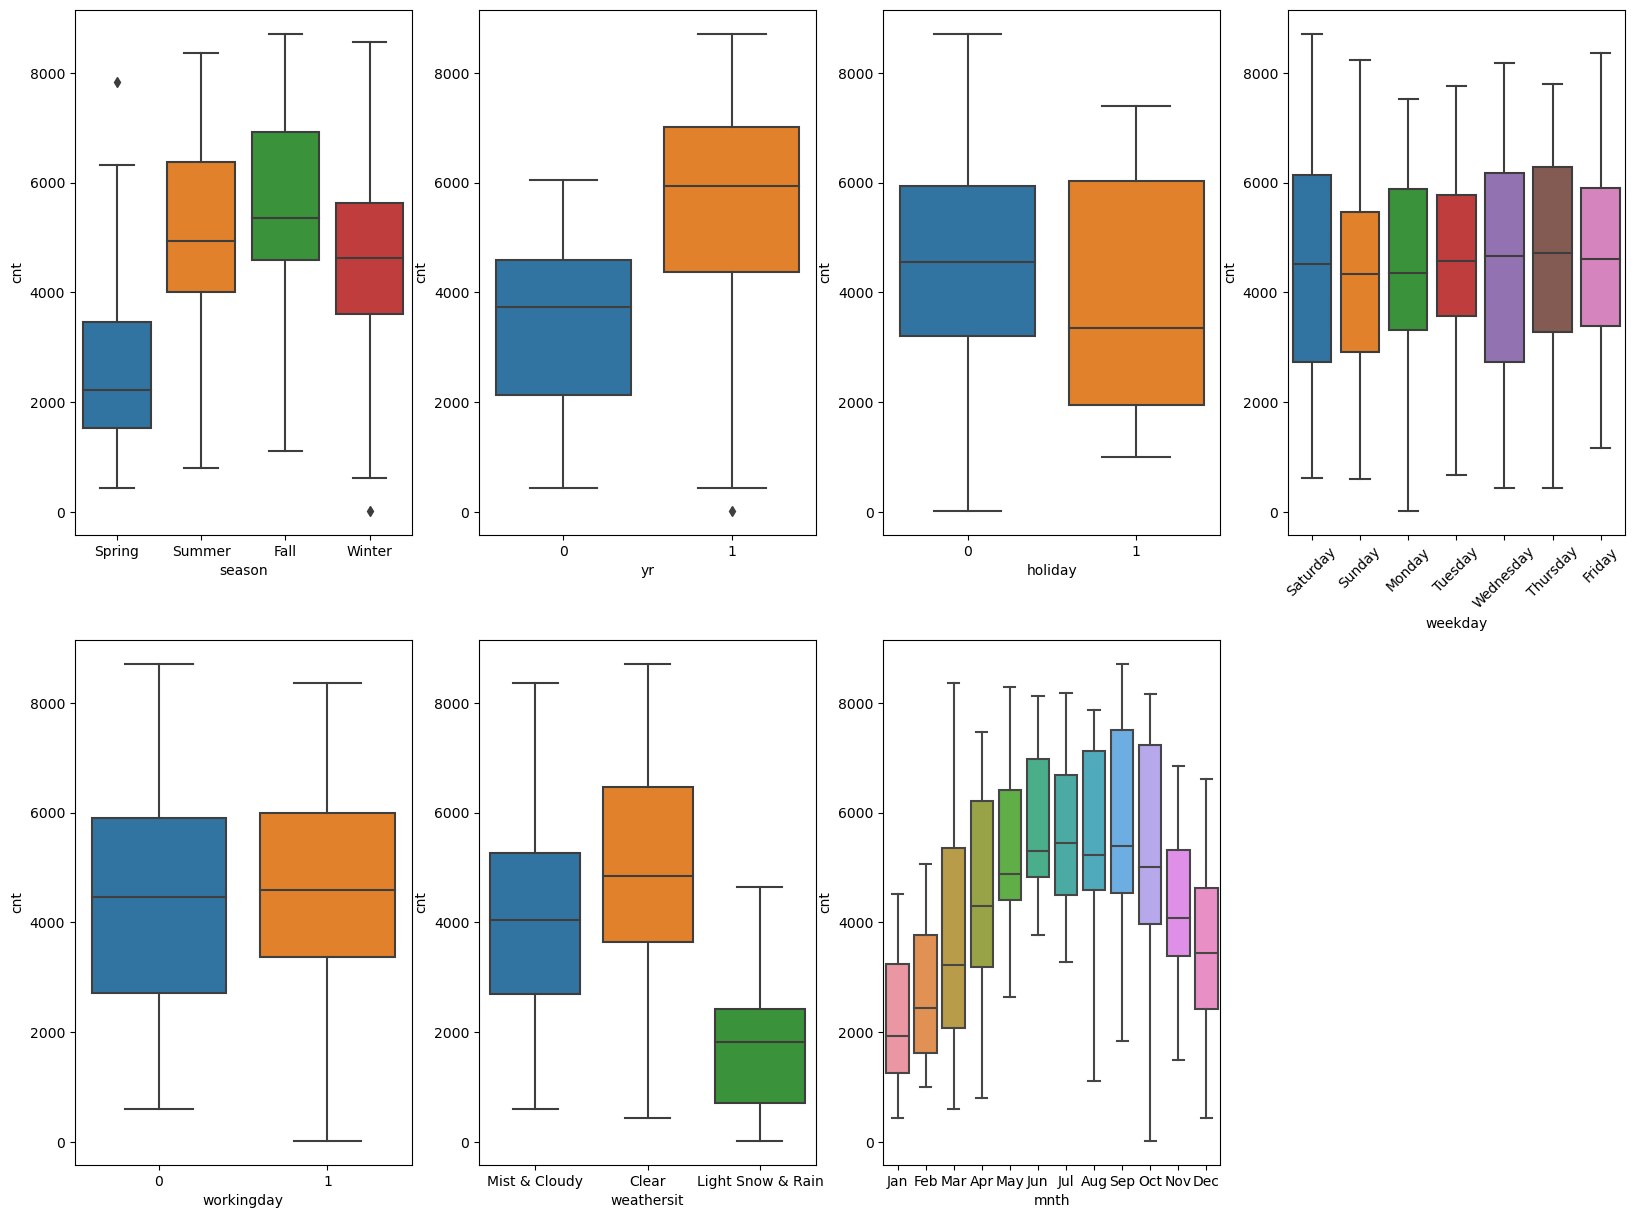

In [27]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.xticks(rotation=45)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.show()

### Insights:

The graph clearly shows the qualitative distributions of the data, now if the model suggests the important predictors, using these graphs we can be more confident about the predictions of the model.

1.For the variable season, we can clearly see that the category Fall, has the highest median, which shows that the demand was high during this season. It is least for spring.

2.The year 2019 had a higher count of users as compared to the year 2018.

3.The count of rentals is almost even throughout the week.

4.There are no users when there is heavy rain/ snow indicating that this weather is quite adverse. Highest count was seen when the weather situation was Clear, Partly Cloudy.

5.The number of rentals peaked in September, whereas they peaked in December. This observation is consistent with the observations made regarding the weather. As a result of the typical substantial snowfall in December, rentals may have declined.

6.The count of users is less during the holidays.
From the "Workingday" boxplot we can see those maximum bookings happening between 4000 and 6000, that is the median count of users is constant almost throughout the week. There is not much of difference in booking whether its working day or not.

# Step 3 -Data Preparation

#### Creating dummy variables for categorical Variables
The variables mnth weekday season weathersit have various levels, for ex, weathersit has 3 levels , similarly variable mnth has 12 levels.

We will create DUMMY variables for these 4 categorical variables namely - mnth, weekday, season & weathersit.

In [28]:
dummy = bike[['season','mnth','weekday','weathersit']]

In [29]:
dummy = pd.get_dummies(dummy,drop_first=True).astype('uint8')

In [30]:
# Adding the dummy variables to the original dataset by concatenating
bike = pd.concat([dummy,bike],axis = 1)

In [31]:
bike

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,Spring,1,Dec,0,Thursday,1,Mist & Cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Spring,1,Dec,0,Friday,1,Mist & Cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,Spring,1,Dec,0,Saturday,0,Mist & Cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Spring,1,Dec,0,Sunday,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


In [32]:
#Deleting the orginal columns season.weathersit,weekday,mnth

bike.drop(['season', 'weathersit', 'weekday', 'mnth'],axis=1,inplace=True)

bike.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [33]:
bike.shape

(730, 30)

In [34]:
bike.dtypes

season_Spring                     uint8
season_Summer                     uint8
season_Winter                     uint8
mnth_Aug                          uint8
mnth_Dec                          uint8
mnth_Feb                          uint8
mnth_Jan                          uint8
mnth_Jul                          uint8
mnth_Jun                          uint8
mnth_Mar                          uint8
mnth_May                          uint8
mnth_Nov                          uint8
mnth_Oct                          uint8
mnth_Sep                          uint8
weekday_Monday                    uint8
weekday_Saturday                  uint8
weekday_Sunday                    uint8
weekday_Thursday                  uint8
weekday_Tuesday                   uint8
weekday_Wednesday                 uint8
weathersit_Light Snow & Rain      uint8
weathersit_Mist & Cloudy          uint8
yr                                int64
holiday                           int64
workingday                        int64


### Splitting the Data into Train and Test Sets

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
np.random.seed(0)
bike_train,bike_test=train_test_split(bike,train_size=0.7, random_state =100)

In [37]:
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


# Rescaling the Features
Although scaling doesn't impact the linear model in the case of simple linear regression, however while performing multiplwe linear regression it might impact the model. As we can see that the value of the feature cnt has much higher values as compared to the other features like temp, atemp etc. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling.

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
# 1.Instantiate the object 
scaler = MinMaxScaler()
# Create a list of numeric variables except dummy variables
num_vars = ['cnt','hum','windspeed','temp','atemp']
# 2.Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [40]:
bike_train.describe()



,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


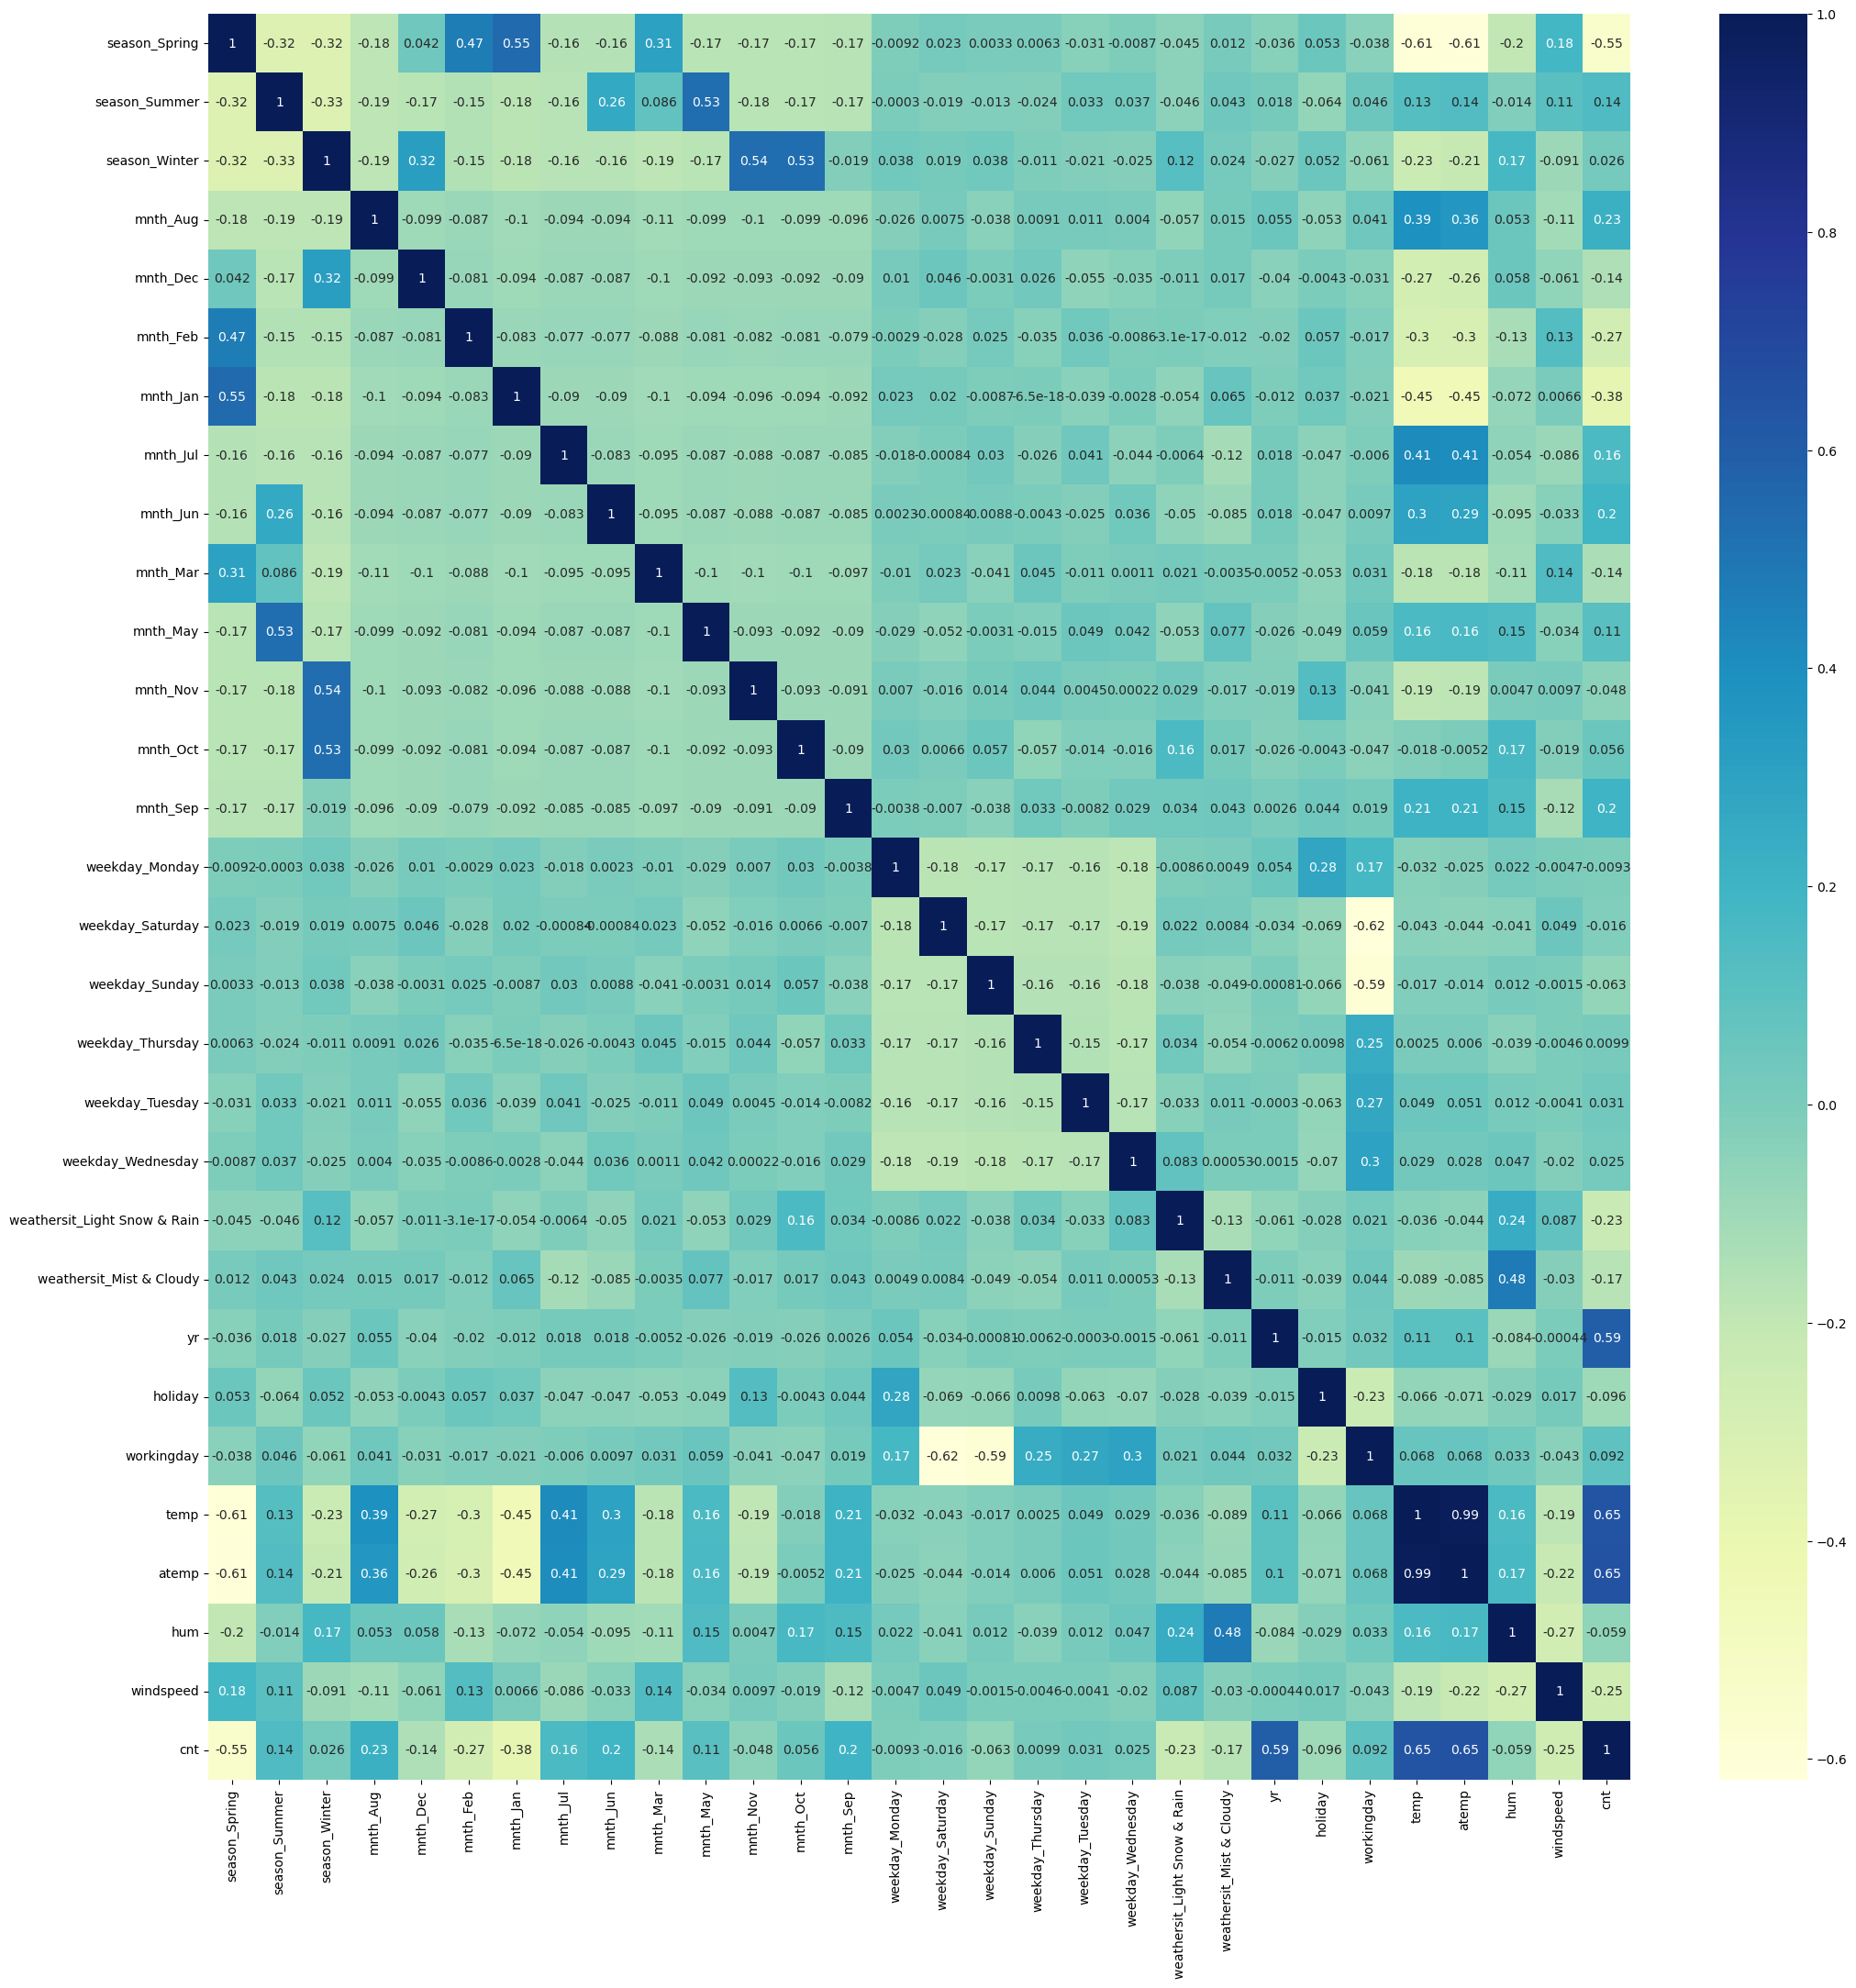

In [41]:
#Checking the coefficients to see which variables are highly correlated
plt.figure(figsize = (25, 25))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Step 4:Building linear Model

In [42]:
#Dividing into X and Y sets for the model building
y_train = bike_train.pop('cnt')
X_train = bike_train

In [43]:
y_train.shape

(510,)

### We will use a mixed approach to build the model.
 Here we are using RFE approach for feature selection and then we will use the statsmodel approach for building the model

### Feature Selection

We will start with 15 variables
We need to use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [44]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 7),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [47]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [48]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'atemp'],
      dtype='object')

## Building Model using statsmodels

In [49]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

Adding a constant variable
For statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [50]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

In [51]:
X_train_lm.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed
576,1.0,0,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475
111,1.0,0,1,0,0,0,0,0,0,1,0,0,1,0.345824,0.751824,0.380981


### Building the first linear models using statsmodels

## Model 1

In [52]:
lm_1=sm.OLS(y_train,X_train_lm).fit() #Running the linear model
print(lm_1.summary())   #Summary of model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          4.22e-191
Time:                        13:40:14   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Here we see that the p-value for all the variables is < 0.05 . Hence, we will keep all the columns and check for VIF.

Checking VIF for multicollinearity
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. 



In [53]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  

,Features,VIF
13,hum,29.37
12,temp,17.78
11,workingday,5.31
14,windspeed,4.73
0,season_Spring,4.53
2,season_Winter,3.46
1,season_Summer,2.85
8,weathersit_Mist & Cloudy,2.29
9,yr,2.09
6,weekday_Saturday,1.98


In general we want VIF to be less than 5. We will drop feature 'hum' which has highest VIF of 29.37

In [54]:
# dropping hum since its vif > 5

X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [55]:
X_train_rfe.head()

,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,windspeed
576,0,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.264686
426,1,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.255342
728,1,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.663106
482,0,1,0,0,0,0,1,0,1,1,0,0,0.395666,0.188475
111,0,1,0,0,0,0,0,0,1,0,0,1,0.345824,0.380981


### Model 2

In [56]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_2=sm.OLS(y_train,X_train_lm).fit() #Running the linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          1.60e-188
Time:                        13:42:08   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  

,Features,VIF
12,temp,7.07
11,workingday,5.24
13,windspeed,4.68
0,season_Spring,3.07
1,season_Summer,2.34
9,yr,2.08
2,season_Winter,1.98
6,weekday_Saturday,1.97
3,mnth_Jan,1.62
4,mnth_Jul,1.59


As we can see that all p-values<0.05 and VIF value for temp is high but we cannot drop temp as it is correlated with cnt and its an important variable for analysis so we will drop workingday

In [58]:
X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

In [59]:
X_train_rfe

,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,temp,windspeed
576,0,0,0,0,1,0,0,0,0,1,0,0.815169,0.264686
426,1,0,0,0,0,0,1,0,1,1,0,0.442393,0.255342
728,1,0,0,0,0,0,0,0,0,1,0,0.245101,0.663106
482,0,1,0,0,0,0,1,0,1,1,0,0.395666,0.188475
111,0,1,0,0,0,0,0,0,1,0,0,0.345824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,0,0,0,1,0,0.863973,0.187140
53,1,0,0,0,0,0,0,0,0,0,0,0.202618,0.111379
350,0,0,1,0,0,0,1,0,1,0,0,0.248216,0.431816
79,0,1,0,0,0,0,0,0,1,0,0,0.462664,0.529881


### Model 3

In [60]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_3=sm.OLS(y_train,X_train_lm).fit() #Running the linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          2.48e-186
Time:                        13:44:30   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  

,Features,VIF
11,temp,5.16
12,windspeed,4.64
0,season_Spring,2.76
1,season_Summer,2.24
9,yr,2.07
2,season_Winter,1.80
3,mnth_Jan,1.61
4,mnth_Jul,1.59
8,weathersit_Mist & Cloudy,1.56
5,mnth_Sep,1.34


As the p-value of weekday_saturday >0.05 so we will drop weekday_saturday column

In [62]:
X_train_rfe = X_train_rfe.drop(['weekday_Saturday'], axis=1)

In [63]:
X_train_rfe.head()

,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,temp,windspeed
576,0,0,0,0,1,0,0,0,1,0,0.815169,0.264686
426,1,0,0,0,0,0,0,1,1,0,0.442393,0.255342
728,1,0,0,0,0,0,0,0,1,0,0.245101,0.663106
482,0,1,0,0,0,0,0,1,1,0,0.395666,0.188475
111,0,1,0,0,0,0,0,1,0,0,0.345824,0.380981


### Model 4

In [64]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_4=sm.OLS(y_train,X_train_lm).fit() #Running the linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          8.14e-187
Time:                        13:46:31   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  

,Features,VIF
10,temp,5.13
11,windspeed,4.62
0,season_Spring,2.75
1,season_Summer,2.24
8,yr,2.07
2,season_Winter,1.78
3,mnth_Jan,1.61
4,mnth_Jul,1.59
7,weathersit_Mist & Cloudy,1.56
5,mnth_Sep,1.34


Now as we can see, the VIFs and p-values both are within an acceptable range. Hence, we finalise lm_4 as the final model to proceed with the future prdeictions.

In [67]:
X_train_rfe.shape

(510, 12)

# Step : Residual Analysis of the train data


So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.



In [68]:
y_train_pred = lm_4.predict(X_train_lm)

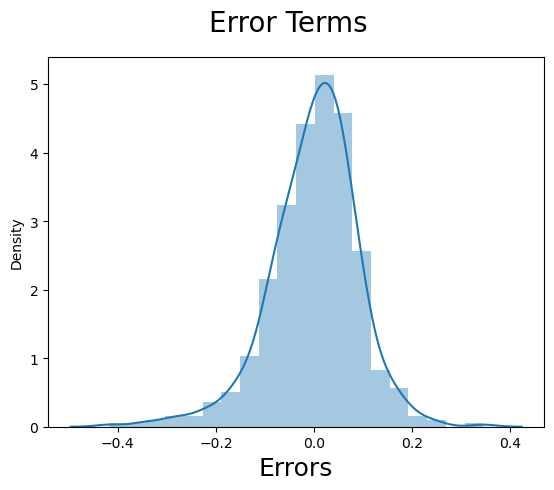

In [70]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18)  
plt.show()


We can clearly see that the error terms are centred around 0 and follows a normal distribution, this is in accordance with the stated assumptions of linear regression.

#### Cross-verifying the above conclusion using a qq-plot as well:


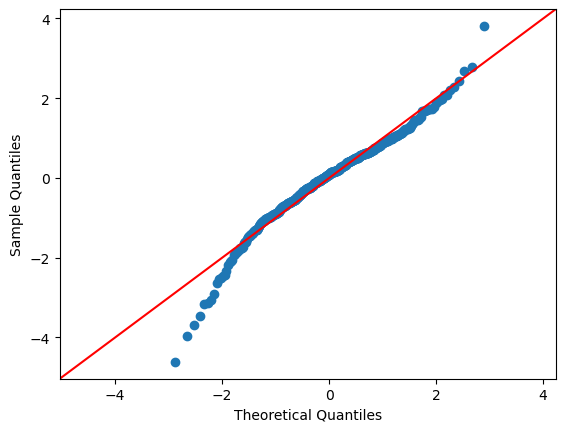

In [71]:
# Plot the qq-plot of the error terms

sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

Here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed .



# Step 5: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model that we got.

Applying the scaling on the test sets

In [72]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [73]:
bike_test.describe()


,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


Dividing into X_test and y_test

In [74]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [75]:
# Making predictions using the final model

X_test = sm.add_constant(X_test[X_train_rfe.columns])
y_test_pred = lm_4.predict(X_test)

### Calculating the r-squared
R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [76]:
from sklearn.metrics import r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.8367828175631212
r2_score of test dataset 0.8025684920603356


We can see that the r_squared on the test set is 0.803 and the r-squared on the train set is 0.837  which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

In [80]:
# evaluate
r2_score_test = r2_score(y_true= y_test, y_pred=y_test_pred)
r2_score_test

0.8025684920603356

In [81]:
N= len(X_test) 
final_variables = list(lm_4.params.index)
final_variables.remove('const')
independent_var_count =len(final_variables) # Number of independent variables

r2_test_adj = round((1-((1-r2_score_test)*(N-1)/(N-independent_var_count-1))), 3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj, 3))

Adj. R-Squared for Test dataset:  0.791


# Step 6: Model Evaluation
Plotting the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

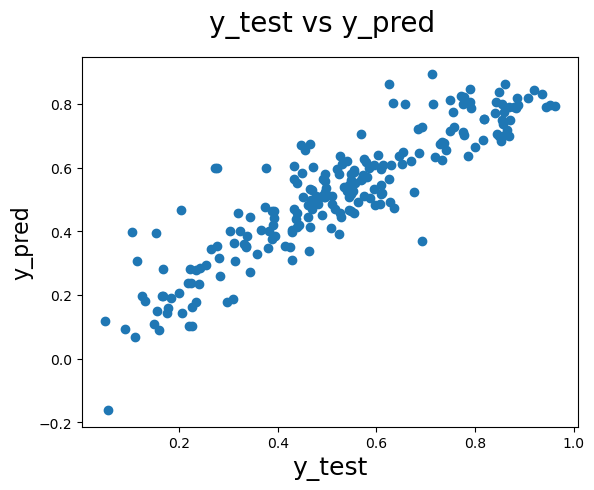

In [77]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

We can conclude that the final model fit isn't by chance, and has descent predictive power.

Getting the variable names and the coefficient values for the final equation of the best fitted line

In [78]:
param = pd.DataFrame(lm_4.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,13))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param


,Variables,Coefficient value
index,,
11,temp,0.472115
9,yr,0.234283
0,const,0.215392
6,mnth_Sep,0.076399
3,season_Winter,0.075655
2,season_Summer,0.043385
4,mnth_Jan,-0.038259
5,mnth_Jul,-0.050347
1,season_Spring,-0.061696


## Final Conclusions :
By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

cnt=0.215+(0.472*temp)+(0.234*yr)+(0.076*mnth_Sep)+(0.075*season_Winter)+(0.043*season_Summer)-(0.038*mnth_Jan)-(0.050*mnth_Jul)-(0.061*season_Spring)-(0.079*weathersit_Mist & Cloudy)-(0.096*holiday)-(0.154*windspeed)-(0.285*weathersit_Light Snow & Rain)


Coefficients of the variable will explain the factor effecting the bike demand.

Train Set R2-Score is : 0.837
Test Set R2-Score is : 0.802
Train Set Adj-R-square is : 0.833
Adj. R-Squared for Test dataset : 0.791





All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.

All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 80% of bike demand.

Coeffiencients of the variables explains the factors effecting the bike demand

Based on final model top three features contributing significantly towards explaining the demand are:

Temperature (0.472115)

weathersit : Light Snow, Light Rain + Mist & Cloudy (-0.285425)

year (0.234283)

Hence, it can be clearly concluded that the variables temperature , season/ weather situation and month are significant in predicting the demand for shared bikes .

# Final Recommendations for the Company:
● The months - Jan , Jul , Sep , Nov , Dec should be considered by the company as they have a higher demand as compared to other months.

● With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.

● During the Winter season the demand rises.

● Holiday time seems to be least interesting for biking.